In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
from google.colab import files
uploaded  = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [6]:
corr = data.corr()
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


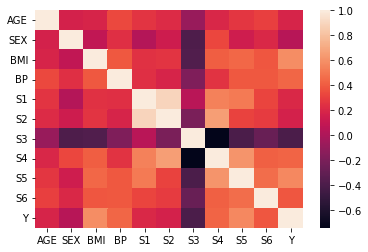

In [7]:
import seaborn as sns
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns)

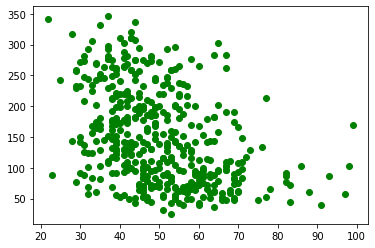

In [9]:
plt.scatter(data.S3, data.Y, color='green')

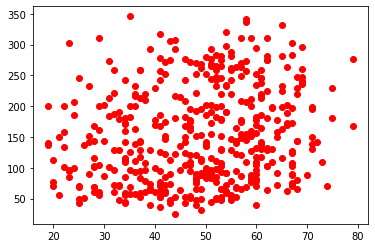

In [15]:
plt.scatter(data.AGE, data.Y, color='red')



In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S3']], data.Y, test_size=0.2, random_state=0)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.006391734558824691

In [19]:
model.coef_

array([-2.62437102])

In [20]:
model.intercept_

282.1147907585499

In [23]:
predykcje = model.predict(X_test)

In [24]:
predykcje

array([169.26683673, 164.01809469, 179.76432083, 164.01809469,
       101.03319011, 166.64246571, 119.40378728, 161.39372366,
       161.39372366, 150.89623957, 190.26180492, 192.88617595,
       174.51557878, 164.01809469, 187.6374339 , 140.39875547,
       158.76935264,  98.40881909, 161.39372366, 171.89120776,
       190.26180492, 129.90127138, 166.64246571, 137.77438445,
       182.38869185, 129.90127138,  24.92643042,  98.40881909,
       106.28193216, 166.64246571, 132.5256424 , 137.77438445,
       153.52061059, 161.39372366, 137.77438445, 156.14498161,
       182.38869185, 206.00803107, 129.90127138, 153.52061059,
       153.52061059, 179.76432083, 127.27690035, 161.39372366,
       198.134918  , 127.27690035,  80.03822192, 114.15504523,
       161.39372366, 158.76935264, 195.51054697, 150.89623957,
       124.65252933, 179.76432083, 161.39372366, 179.76432083,
       164.01809469, 114.15504523, 143.0231265 , 148.27186854,
       177.13994981, 135.15001342, 192.88617595, 150.89

In [26]:
print("Mean squared error: %.2f" % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 5095.15


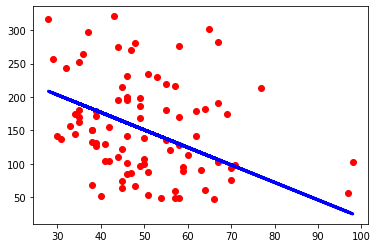

In [28]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, predykcje, color='blue', linewidth=3)
plt.show()

Poszukiwanie modelu korzystającego tylko z jednej zmiennej, który uzyskuje najlepsze wyniki pomiaru jakości regresji

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['AGE']], data.Y, test_size=0.2, random_state=0)
model1 = LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)


0.03400038308863318

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data[['SEX']], data.Y, test_size=0.2, random_state=0)
model2 = LinearRegression()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.001552773240462657

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data[['BP']], data.Y, test_size=0.2, random_state=0)
model3 = LinearRegression()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.18725935383524006

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data[['S1']], data.Y, test_size=0.2, random_state=0)
model4 = LinearRegression()
model4.fit(X_train, y_train)
model4.score(X_test, y_test)

0.04755806530178808

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data[['S2']], data.Y, test_size=0.2, random_state=0)
model5 = LinearRegression()
model5.fit(X_train, y_train)
model5.score(X_test, y_test)

0.04995955133000085

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data[['S4']], data.Y, test_size=0.2, random_state=0)
model6 = LinearRegression()
model6.fit(X_train, y_train)
model6.score(X_test, y_test)

0.1088686553962428

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data[['S5']], data.Y, test_size=0.2, random_state=0)
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.19787113965189795

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data[['S6']], data.Y, test_size=0.2, random_state=0)
model8 = LinearRegression()
model8.fit(X_train, y_train)
model8.score(X_test, y_test)

0.14792764300640993

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data[['BMI']], data.Y, test_size=0.2, random_state=0)
model0 = LinearRegression()
model0.fit(X_train, y_train)
model0.score(X_test, y_test)

0.19057346847560142

In [ ]:
          R^2
BMI 0.19057346847560142  model0
S3  0.006391734558824691 model
AGE 0.03400038308863318  model1
SEX 0.001552773240462657 model2
BP  0.18725935383524006  model3
S1  0.04755806530178808  model4
S2  0.04995955133000085  model5
S4  0.1088686553962428   model6
S5  0.19787113965189795  model7
S6  0.14792764300640993  model8

Porównanie najlepiej działającego modelu (model7 dla zmiennej S5 z R^ największym) z regresją wyuczoną na wszystkich zmiennych.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data[['S5']], data.Y, test_size=0.2, random_state=0)
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.19787113965189795

In [41]:
predykcje_dla_modelu7 = model7.predict(X_test)
predykcje_dla_modelu7

array([155.06298222, 217.54875148, 134.55702861, 115.43869591,
       119.13901837, 209.53995172, 122.68516073, 188.73420346,
        81.95591702, 211.2016706 , 191.88633   , 157.409946  ,
       122.68516073, 103.27559895, 179.10651262,  83.79751269,
       153.46122227,  87.36935173,  92.4572951 , 150.17204675,
       122.68516073, 167.58583275, 176.68245879, 103.27559895,
       209.12023922, 186.56711647, 139.44796408, 111.57562779,
       178.50692334, 160.44215468, 177.90733405,  87.36935173,
       111.57562779, 158.18084651, 182.05306569, 164.09108377,
       164.80202535, 161.92399677, 108.89460713, 180.88814936,
       122.68516073, 170.94353276, 192.40026367, 185.46215907,
       129.35773293,  98.81294154, 168.27107765, 112.88615866,
       161.18735851, 176.68245879, 154.26638502,  92.4572951 ,
        97.26257496, 179.70610191, 191.36383076, 185.46215907,
       182.6269583 , 103.27559895, 143.17398322, 194.43030169,
       183.2008509 , 136.54423881, 101.81088798, 139.44

In [42]:
print("Mean squared error: %.2f" % np.mean((model7.predict(X_test) - y_test) ** 2))

Mean squared error: 4113.26


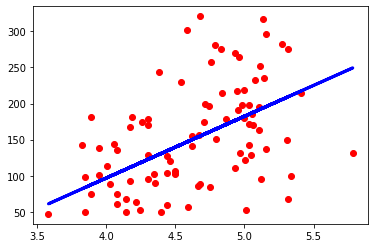

In [43]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, predykcje_dla_modelu7, color='blue', linewidth=3)
plt.show()